In [294]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import gc   #Gabage collector for cleaning deleted data from memory

COL_VALUES = ["x", "y", "z"] #always obj at the end

data=pd.read_csv("data/data_out_full.csv", names = COL_VALUES + ["obj"])

In [295]:
data.loc[1000000:1000010,['x','y','z','obj']]

,x,y,z,obj
1000000,98,6,4,1
1000001,104,6,0,1
1000002,109,2,-1,1
1000003,101,8,-3,1
1000004,98,-1,-2,1
1000005,107,0,-2,1
1000006,107,3,3,1
1000007,101,0,0,1
1000008,103,8,-4,1
1000009,106,3,0,1


In [296]:
def normalize(df):
    result = df.copy()
    for feature_name in COL_VALUES:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

data=normalize(data)
df1=data[data['obj'] == 1]
df2=data[data['obj'] == 2]
df2

,x,y,z,obj
0,0.492537,0.220930,0.441379,2
1,0.388060,0.302326,0.444828,2
2,0.417910,0.302326,0.448276,2
3,0.402985,0.372093,0.448276,2
4,0.447761,0.337209,0.451724,2
5,0.417910,0.290698,0.444828,2
6,0.447761,0.279070,0.441379,2
7,0.432836,0.279070,0.448276,2
8,0.447761,0.302326,0.451724,2
9,0.447761,0.325581,0.441379,2


In [322]:
X = [] # images
y = [] # labels
ROWS = 20

#create the images for each objects

#obj 1
for i in range(0,df1.shape[0]-ROWS,ROWS):
    X.append((df1.iloc[i:i+ROWS,0:3]).values.tolist())
    y.append(0)
lenX = len(X)
print(len(X))

#obj 2
for i in range(0,df2.shape[0]-ROWS,ROWS):
    X.append((df2.iloc[i:i+ROWS,0:3]).values.tolist())
    y.append(1)
print(len(X)-lenX)

56006
53211


In [298]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

a = unison_shuffled_copies(np.array(X), np.array(y))
X = a[0]
y = a[1]
y

array([1, 1, 0, ..., 0, 0, 1])

0
0
0
0
0


[[0.5074626865671642, 0.6744186046511628, 0.4586206896551724],
 [0.44776119402985076, 0.686046511627907, 0.45517241379310347],
 [0.5074626865671642, 0.686046511627907, 0.45517241379310347],
 [0.4626865671641791, 0.6976744186046512, 0.4413793103448276],
 [0.417910447761194, 0.6046511627906976, 0.4517241379310345],
 [0.5373134328358209, 0.7441860465116279, 0.4379310344827586],
 [0.4925373134328358, 0.686046511627907, 0.46551724137931033],
 [0.43283582089552236, 0.7093023255813954, 0.4482758620689655],
 [0.5074626865671642, 0.686046511627907, 0.4379310344827586],
 [0.5074626865671642, 0.7209302325581395, 0.4379310344827586],
 [0.5373134328358209, 0.6976744186046512, 0.4482758620689655],
 [0.47761194029850745, 0.6976744186046512, 0.45517241379310347],
 [0.5223880597014925, 0.6511627906976745, 0.4379310344827586],
 [0.4626865671641791, 0.7093023255813954, 0.4586206896551724],
 [0.4925373134328358, 0.6511627906976745, 0.43448275862068964],
 [0.47761194029850745, 0.6744186046511628, 0.4482758

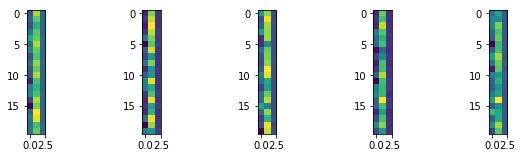

In [323]:
plt.figure(figsize=(10,5))
columns = 5
for i in range(columns):
    plt.subplot(5 / columns + 1, columns, i + 1)
    plt.imshow(X[30000+i*20])
    print(y[30000+i*20])
X[3000]

In [301]:
#Convert list to numpy array
X = np.array(X)
y = np.array(y)
print("Shape of all images is:", X.shape)
print("Shape of all labels is:", y.shape)

#Lets split the data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=2)

print("Shape of train images is:", X_train.shape)
print("Shape of validation images is:", X_val.shape)
print("Shape of train labels is:", y_train.shape)
print("Shape of validation labels is:", y_val.shape)

#clear memory
del X
del y
gc.collect()

#get the length of the train and validation data
ntrain = len(X_train)
nval = len(X_val)

('Shape of all images is:', (109217, 20, 3))
('Shape of all labels is:', (109217,))
('Shape of train images is:', (87373, 20, 3))
('Shape of validation images is:', (21844, 20, 3))
('Shape of train labels is:', (87373,))
('Shape of validation labels is:', (21844,))


In [302]:
from keras.models import Sequential
from keras.layers import (Activation, Dropout, Flatten, Dense, Convolution2D, MaxPooling2D)
 
 
## Some model and data processing constants
 
batch_size = 128
nb_classes = 2
nb_epoch = 12
 
# input image dimensions
img_rows, img_cols = 20, 3
 
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3
 
model = Sequential() 
 
model.add(layers.Conv2D(32, (3, 3), padding="valid", input_shape=(1, 20, 3)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
 
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 32, 18, 1)         320       
_________________________________________________________________
dropout_9 (Dropout)          (None, 32, 18, 1)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               73856     
_________________________________________________________________
activation_17 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 2)                 258       
__________

In [303]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_val = np_utils.to_categorical(y_val, nb_classes)
X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
X_val = X_val.reshape(X_val.shape[0], 1, img_rows, img_cols)

model.fit(X_train, Y_train,
          batch_size=batch_size, 
          epochs=10, verbose=1,
          validation_data=(X_val, Y_val))

Train on 87373 samples, validate on 21844 samples
Epoch 1/10
87373/87373 [==============================] - 11s 127us/step - loss: 0.4298 - acc: 0.7690 - val_loss: 0.3049 - val_acc: 0.7937
Epoch 2/10
87373/87373 [==============================] - 11s 121us/step - loss: 0.3075 - acc: 0.8426 - val_loss: 0.2271 - val_acc: 0.8877
Epoch 3/10
87373/87373 [==============================] - 11s 122us/step - loss: 0.2411 - acc: 0.8903 - val_loss: 0.1704 - val_acc: 0.9314
Epoch 4/10
87373/87373 [==============================] - 11s 126us/step - loss: 0.1758 - acc: 0.9311 - val_loss: 0.1467 - val_acc: 0.9473
Epoch 5/10
87373/87373 [==============================] - 11s 123us/step - loss: 0.1610 - acc: 0.9384 - val_loss: 0.1758 - val_acc: 0.9228
Epoch 6/10
87373/87373 [==============================] - 11s 126us/step - loss: 0.1515 - acc: 0.9429 - val_loss: 0.1339 - val_acc: 0.9463
Epoch 7/10
87373/87373 [==============================] - 11s 125us/step - loss: 0.1492 - acc: 0.9432 - val_loss: 0.

1
1
1
1
0


array([[0.10642493, 0.893575  ]], dtype=float32)

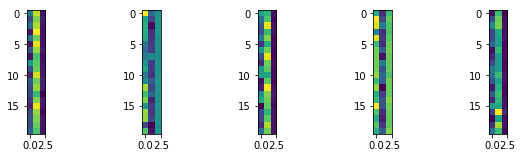

In [328]:
#try predict from the validation set
num = 14

plt.figure(figsize=(10,5))
columns = 5
for i in range(columns):
    plt.subplot(5 / columns + 1, columns, i + 1)
    print(y_val[num+i])
    plt.imshow(X_val[num+i][0])
    
x = np.expand_dims(X_val[num], axis=0)
model.predict(x)

In [ ]:
#try predict from external data
data=pd.read_csv("data/data_val.csv", names = COL_VALUES + ["obj"])
def normalize(df):
    result = df.copy()
    for feature_name in COL_VALUES:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

data=normalize(data)